In [7]:
import os
import numpy as np
import pandas as pd

In [3]:
os.chdir("/workspace/yappcdwebpage/Reranking/GNN_DOVE")
path = '../gnn-model_result/preprocessing_result/'
results=[x for x in os.listdir(path) ] # 1a2k.txt ...
results.sort()
print(results)
num_pdb = len(results)
print(num_pdb)

# the board
board = [[0] * 51 for _ in range(num_pdb)]
board2 = [[0] * 51 for _ in range(num_pdb)]
scores = [] # hit 한 시점의 score 기록
names = [] # hit 한 시점의 name 기록
rs = pd.DataFrame()

['1a2k.txt', '1a2y.txt', '1akj.txt', '1avw.txt', '1bth.txt', '1bui.txt', '1bvn.txt', '1cho.txt', '1dfj.txt', '1e96.txt', '1ewy.txt', '1ezu.txt', '1f51.txt', '1f6m.txt', '1fm9.txt', '1g20.txt', '1g6v.txt', '1gpq.txt', '1gpw.txt', '1he1.txt', '1he8.txt', '1hxy.txt', '1jps.txt', '1ku6.txt', '1l9b.txt', '1ma9.txt', '1nbf.txt', '1ook.txt', '1p7q.txt', '1ppf.txt', '1r0r.txt', '1r4m.txt', '1s6v.txt', '1t6g.txt', '1tmq.txt', '1tx6.txt', '1u7f.txt', '1uex.txt', '1ugh.txt', '1w1i.txt', '1wej.txt', '1wq1.txt', '1xd3.txt', '1xx9.txt', '1yvb.txt', '1zy8.txt', '2a5t.txt', '2bkr.txt', '2bnq.txt', '2btf.txt', '2ckh.txt', '2fi4.txt', '2goo.txt', '2kai.txt', '2sni.txt', '3fap.txt', '3pro.txt', '3sic.txt']
58


In [4]:
# # for every txt files
for i in range(num_pdb):

    sor = path + results[i]
    print("sor: ",sor)

    # open file
    with open(sor,'r') as file:
        lines = file.read().split('\n')
    samesame = 0
    previous = float(lines[0].split('\t')[1])
    ind = 0
    # for rank till 50
    for k in range(1, 51):

        score = float(lines[k].split('\t')[1])
        #print('previous: ', previous)
        #print('score: ', score)
        if score != previous:
            samesame += 1
        previous = score
        board2[i][k] = samesame
        # print(f'board2[{i}][{k}]: ', board2[i][k])

    for k in range(51):

        score = float(lines[k].split('\t')[1])
        name = int(lines[k].split('\t')[0][5:])

        # if there is one hit in group, after that rank is always hit.
        if name > 100:
            print(name, score, k)
            rsn = {}
            if k == 0:
                rsn['name'] = results[i].replace('.txt','')
                rsn['score'] = score
                rsn['no'] = name
                rs = pd.concat([rs, pd.DataFrame([rsn])], ignore_index=True)
            else:
                # find the first same rank
                for j in range(1,51):
                    if board2[i][k] == board2[i][j]:
                        print(board2[i][k] , board2[i][j])
                        ind = board2[i][j]
                        rsn['name'] = results[i].replace('.txt', '')
                        rsn['score'] = score
                        rsn['no'] = name

                        scores.append(float(lines[j].split('\t')[1]))
                        names.append(int(lines[j].split('\t')[0][5:]))
                        print('scores: ', lines[j].split('\t')[1])
                        print(results[i] , '- ind: ', ind)
                        rs = pd.concat([rs, pd.DataFrame([rsn])], ignore_index=True)
                        break
            # print("the index: ", ind)
            # first rank to ~
            for c in range(ind, 51):
                board[i][c] = 1

            break
    #print(f'board[{i}]: ', board[i])

# pd.options.display.max_rows = 60
# pd.set_option('display.max_rows', None)
print('rs: ', rs)
print(board2[0])
print(board[0])

sor:  ../gnn-model_result/preprocessing_result/1a2k.txt
365130 0.4816 8
8 8
scores:  0.4816
1a2k.txt - ind:  8
sor:  ../gnn-model_result/preprocessing_result/1a2y.txt
128967 0.8293 0
sor:  ../gnn-model_result/preprocessing_result/1akj.txt
82685 0.3956 31
30 30
scores:  0.3956
1akj.txt - ind:  30
sor:  ../gnn-model_result/preprocessing_result/1avw.txt
6928 0.7992 4
4 4
scores:  0.7992
1avw.txt - ind:  4
sor:  ../gnn-model_result/preprocessing_result/1bth.txt
sor:  ../gnn-model_result/preprocessing_result/1bui.txt
13275 0.7939 0
sor:  ../gnn-model_result/preprocessing_result/1bvn.txt
110 0.7393 2
2 2
scores:  0.7393
1bvn.txt - ind:  2
sor:  ../gnn-model_result/preprocessing_result/1cho.txt
105 0.7755 9
9 9
scores:  0.7755
1cho.txt - ind:  9
sor:  ../gnn-model_result/preprocessing_result/1dfj.txt
948 0.7192 0
sor:  ../gnn-model_result/preprocessing_result/1e96.txt
49838 0.72 19
19 19
scores:  0.7200
1e96.txt - ind:  19
sor:  ../gnn-model_result/preprocessing_result/1ewy.txt
16262 0.823 0


In [5]:
hit_result = pd.DataFrame()
cnt = 0
b = np.array(board)
for k in range(58):

    if np.sum(b[k]) == 0:

        result = {}
        #print(results[k].replace('.txt', ''), ': none')
        result['name'] = results[k].replace('.txt', '')
        sor = path + results[k]
        print("sor: ",sor)

        # open file
        with open(sor,'r') as file:
            lines = file.read().split('\n')
        for m in range(len(lines)):
            name = int(lines[m].split('\t')[0][5:])
            score = float(lines[m].split('\t')[1])

            if name > 100:
                result['hit'] = m + 1
                result['score'] = score
                result['no'] = name

            #result['hit'] = 10000
            #result['score'] = -1
            #result['no'] = -1
                print('result:', result)
                hit_result = pd.concat([hit_result, pd.DataFrame([result])], ignore_index=True)
                break
    else:

        for j in range(51):
            if b[k][j] == 1:
                result = {}
                #print(results[k].replace('.txt',''), ': ', j)
                result['name'] = results[k].replace('.txt', '')
                result['hit'] = j + 1
                #result['score'] = scores[cnt]
                #result['no'] = names[cnt]
                #print('result[name]: ', result['name'])
                result['score'] =rs.loc[rs['name']==result['name']]['score'].values[0]
                result['no'] = rs.loc[rs['name']==result['name']]['no'].values[0]
                print('result: ', result)
                hit_result = pd.concat([hit_result, pd.DataFrame([result])], ignore_index=True)
                cnt += 1
                break
hit_result = hit_result.sort_values(by=['hit'], ascending = True)
#hit_result.to_csv('hit_result_each5.csv', index = False)

result:  {'name': '1a2k', 'hit': 9, 'score': 0.4816, 'no': 365130}
result:  {'name': '1a2y', 'hit': 1, 'score': 0.8293, 'no': 128967}
result:  {'name': '1akj', 'hit': 31, 'score': 0.3956, 'no': 82685}
result:  {'name': '1avw', 'hit': 5, 'score': 0.7992, 'no': 6928}
sor:  ../gnn-model_result/preprocessing_result/1bth.txt
result: {'name': '1bth', 'hit': 89, 'score': 0.3966, 'no': 125384}
result:  {'name': '1bui', 'hit': 1, 'score': 0.7939, 'no': 13275}
result:  {'name': '1bvn', 'hit': 3, 'score': 0.7393, 'no': 110}
result:  {'name': '1cho', 'hit': 10, 'score': 0.7755, 'no': 105}
result:  {'name': '1dfj', 'hit': 1, 'score': 0.7192, 'no': 948}
result:  {'name': '1e96', 'hit': 20, 'score': 0.72, 'no': 49838}
result:  {'name': '1ewy', 'hit': 1, 'score': 0.823, 'no': 16262}
result:  {'name': '1ezu', 'hit': 1, 'score': 0.7192, 'no': 21405}
result:  {'name': '1f51', 'hit': 18, 'score': 0.4106, 'no': 307434}
result:  {'name': '1f6m', 'hit': 1, 'score': 0.855, 'no': 150141}
result:  {'name': '1fm

(58, 51)
b: 
 [[0 0 0 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
c:  [14 18 23 25 28 31 31 32 34 36 37 37 37 39 41 41 41 42 43 44 44 44 45 46
 46 46 47 48 48 49 50 51 51 51 53 53 53 53 53 53 53 53 53 53 53 53 53 53
 53 55 55]
[0.24137931 0.31034483 0.39655172 0.43103448 0.48275862 0.53448276
 0.53448276 0.55172414 0.5862069  0.62068966 0.63793103 0.63793103
 0.63793103 0.67241379 0.70689655 0.70689655 0.70689655 0.72413793
 0.74137931 0.75862069 0.75862069 0.75862069 0.77586207 0.79310345
 0.79310345 0.79310345 0.81034483 0.82758621 0.82758621 0.84482759
 0.86206897 0.87931034 0.87931034 0.87931034 0.9137931  0.9137931
 0.9137931  0.9137931  0.9137931  0.9137931  0.9137931  0.9137931
 0.9137931  0.9137931  0.9137931  0.9137931  0.9137931  0.9137931
 0.9137931  0.94827586 0.94827586]


Text(0.5, 1.0, 'Train Code validation')

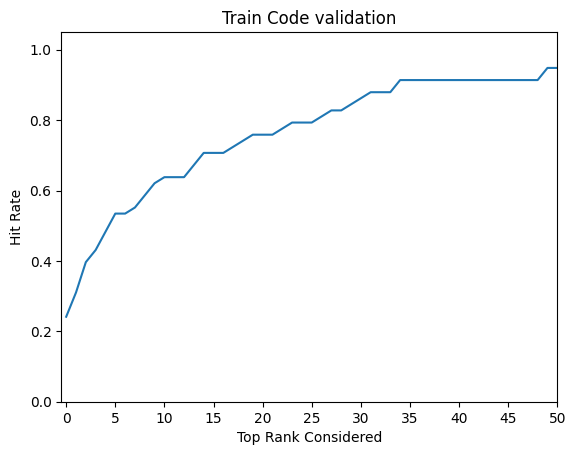

In [6]:
print(b.shape)
print('b: \n', b)
#np.savetxt('fileB.txt', b, fmt = '%2d', delimiter = ',', newline = '\n')
c = np.sum(b, axis=0)
print('c: ', c)
c = c/num_pdb
x = np.arange(0,51,5)

import matplotlib.pyplot as plt
print(c)
plt.figure(linewidth = 5)
plt.xlim(-0.5, 50)
plt.xticks(x)
plt.ylim(0,1.05)
plt.plot(c)
plt.xlabel("Top Rank Considered")
plt.ylabel("Hit Rate")
plt.title("Train Code validation")

#plt.savefig('FigureA3.png')